# ***U.S Census At School - Analyzing the Data***
---

*José Carrera - ____*

*Martín García - 2230436*

*David Melo - ____*

*Juan Andrés Ruiz - 2230557*

## ***Preparación y Exploración de Datos***

### **Importando las librerías**

In [67]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy
import seaborn as sns
import numpy as np

plt.style.use('ggplot')

### **Leyendo el dataframe y mostrando las primeras filas**

In [2]:
df = pd.read_csv("../data/merged_data.csv")

In [3]:
df.head(10)

,Region,Gender,Handed,Favourite_physical_activity,Importance_reducing_pollution,Birth_month,Beverage,Favorite_School_Subject,Sleep_Hours_Non_Schoolnight,Paid_Work_Hours,Work_At_Home_Hours,Planned_Education_Level
0,CA,Male,Right-Handed,Running/Jogging,1000,April,Water,Computers and technology,11,0,10,Undergraduate degree
1,CA,Male,Right-Handed,Walking/Hiking,1000,May,Water,Science,12,0,7,Graduate degree
2,CA,Male,Right-Handed,Soccer,1000,June,Water,Mathematics and statistics,10,0,6,Some college
3,CA,Male,Right-Handed,Swimming,1000,June,Water,Physical education,8,0,7,Other
4,CA,Male,Right-Handed,Basketball,900,July,Water,English,9,0,4,Graduate degree
5,CA,Male,Right-Handed,Swimming,0,August,Water,Mathematics and statistics,8,0,3,Graduate degree
6,CA,Female,Right-Handed,Martial Arts,989,August,Water,Art,9,0,3,Graduate degree
7,CA,Female,Right-Handed,Tennis,650,June,Water,History,11,17,7,Graduate degree
8,CA,Male,Right-Handed,Athletics,1000,December,Water,Art,8,0,2,Some college
9,CA,Male,Right-Handed,Soccer,91,September,Water,History,7,14,10,Graduate degree


### **Mostrando sus dimensiones**

In [4]:
filas = df.shape[0]
columnas = df.shape[1]

print(f"El dataset tiene {filas} filas y {columnas} columnas.")

El dataset tiene 1443 filas y 12 columnas.


### **Tipos de variables**

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1443 entries, 0 to 1442
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   Region                         1443 non-null   object
 1   Gender                         1443 non-null   object
 2   Handed                         1443 non-null   object
 3   Favourite_physical_activity    1443 non-null   object
 4   Importance_reducing_pollution  1443 non-null   int64 
 5   Birth_month                    1443 non-null   object
 6   Beverage                       1443 non-null   object
 7   Favorite_School_Subject        1443 non-null   object
 8   Sleep_Hours_Non_Schoolnight    1443 non-null   int64 
 9   Paid_Work_Hours                1443 non-null   int64 
 10  Work_At_Home_Hours             1443 non-null   int64 
 11  Planned_Education_Level        1443 non-null   object
dtypes: int64(4), object(8)
memory usage: 135.4+ KB


In [6]:
df["Sleep_Hours_Non_Schoolnight"].value_counts()

Sleep_Hours_Non_Schoolnight
10    345
9     318
8     282
7     107
12     98
11     81
6      76
5      53
4      34
3      19
13     10
14      6
15      5
2       5
1       4
Name: count, dtype: int64

### **Sobre el dataset**

#### ***a) Unidad de estudio***
La unidad de estudio en este caso corresponde a cada estudiante individual que respondió al cuestionario "*Census at School*". Cada fila del dataset representa un estudiante con sus respectivas características.

#### ***b) Población objeto de estudio***
La población objeto de estudio son los estudiantes de los Estados Unidos que participaron en el cuestionario "*Census at School*". Esta población incluye a estudiantes de diversas edades, géneros, y características socioeconómicas, aunque en este análisis se centró en un subconjunto específico de estudiantes (de 500 por cada estado seleccionado).

#### ***c) Muestra de estudio***
La muestra de estudio es un subconjunto de estudiantes que se seleccionó de la población original. Este archivo tiene 12 columnas, puesto que se han reducido las variables de interés para podernos concentrar en aspectos específicos para el análisis. 

#### ***d) Variable de análisis***
Las variables de análisis son las columnas del dataset que iremos a analizar a continuación. Cada columna en el archivo CSV representa una variable distinta que se analizará. Estas variables pueden incluir edad, género, tiempos de viaje a la escuela, altura, y otros atributos de los estudiantes según el cuestionario original.

#### ***e) Tipo de variables y su escala de medición***

##### **Tipo de Variables**

***Categóricas***: Variables que representan categorías o grupos, como "Género" (Male, Female), "Método de transporte" (Car, Bus, etc.).

***Numéricas***:
* **Discretas**: Contadores como  la cantidad de personas en el hogar.
* **Continuas**: Medidas como altura, tiempo de viaje, etc.

##### **Escala de Medición**

***Nominal***: Categorías sin un orden intrínseco (*por ejemplo, "**Género**"*).

***Ordinal***: Categorías con un orden lógico (*aunque no siempre numérico; por ejemplo, "**Nivel de educación planeado**"*).

***Intervalo***: Variables numéricas donde las diferencias son significativas, pero no hay un verdadero cero (*no aplicable en el dataset*).

***Razón***: Variables numéricas con un verdadero cero, como altura, tiempo, etc.

#### ***f) Variables clave para el análisis***

* ***Region*** (Estado): Útil para segmentar los resultados de los análisis geográficamente.

* ***Gender*** (*Género*): Es fundamental para realizar comparaciones entre hombres y mujeres en diversas actividades y preferencias.

* ***Favourite_physical_activity*** (*Actividad física favorita*): Permite identificar patrones en las preferencias deportivas y cómo estas se relacionan con otras variables como el género o la región.

* ***Importance_reducing_pollution*** (*Importancia de reducir la contaminación*): Es una variable ordinal que se puede analizar en relación con otras variables como la educación planificada o el género.

* **Sleep_Hours_Non_Schoolnight** (*Horas de sueño en noches sin clases*): Importante para analizar hábitos de sueño y cómo estos varían según otras características.

* ***Paid_Work_Hours*** (*Horas trabajadas con pago*): Se puede usar para entender cómo los estudiantes distribuyen su tiempo entre el trabajo y otras actividades.

* ***Planned_Education_Level*** (*Nivel de educación planificado*): Esta variable ofrece insights sobre las aspiraciones académicas y se puede cruzar con variables como el género o el mes de nacimiento.

## ***Análisis Descriptivo de los Datos***

### *1. ¿Cuántos estudiantes son diestros, zurdos o ambidiestros?*
Existen **1250** estudiantes que son *diestros*, **134** que son *zurdos* y **59** que manejan ambas manos (*ambidiestros*).

In [7]:
conteo_mano_dominante = df["Handed"].value_counts()

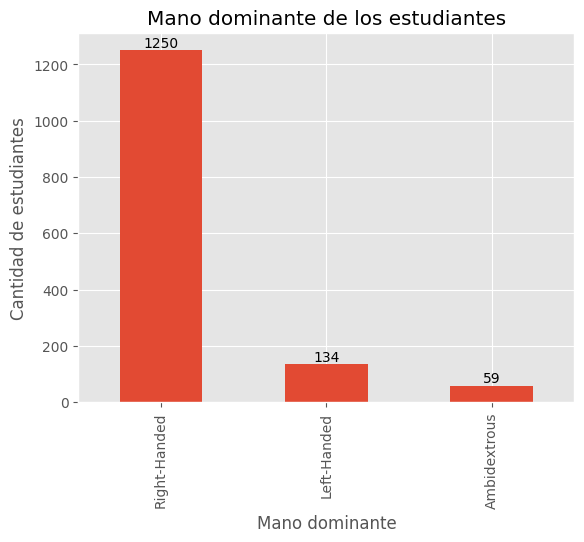

In [8]:
conteo_mano_dominante.plot(kind="bar")

for i, value in enumerate(conteo_mano_dominante):
    plt.text(i, value, str(value), ha = 'center', va = 'bottom')

plt.title("Mano dominante de los estudiantes")
plt.xlabel("Mano dominante")
plt.ylabel("Cantidad de estudiantes")

plt.show()

### *2. ¿Cuál es el mes donde nacieron más estudiantes de los que participan en el Censo escolar en cada estado?*

De los estudiantes que participan en el Censo escolar, se puede determinar que el mes donde más nacieron estudiantes en todos los estados fue **Septiembre**.

In [9]:
conteo_nacimientos_por_mes = (df.groupby(['Region', 'Birth_month']).size()
                            .reset_index(name='Count'))

mes_más_comun_por_estado = conteo_nacimientos_por_mes.groupby('Region').agg(
    Mes_Nacimiento=('Birth_month', lambda x: x.loc[x.idxmax()]),
    Conteo=('Count', 'max')
).reset_index()

In [10]:
mes_más_comun_por_estado

,Region,Mes_Nacimiento,Conteo
0,CA,September,38
1,FL,September,38
2,NY,September,41
3,TX,September,38


### *3. ¿Cuál es la bebida favorita de los estudiantes que participan en el Censo escolar en cada estado?*

De los estudiantes que participan en el Censo escolar, se puede determinar que la bebida favorita en todos los estados es **el agua**.

In [11]:
conteo_bebidas_favoritas = (df.groupby(["Region", "Beverage"]).size()
                                       .reset_index(name='Count'))

bebida_favorita_por_estado = conteo_bebidas_favoritas.groupby('Region').agg(
    Bebida_Favorita=('Beverage', lambda x: x.loc[x.idxmax()]),
    Conteo=('Count', 'max')
).reset_index()

bebida_favorita_por_estado

,Region,Bebida_Favorita,Conteo
0,CA,Water,280
1,FL,Water,255
2,NY,Water,260
3,TX,Water,235


### *4. ¿Cuál es el deporte / actividad favorita de los estudiantes que participan en el Censo escolar en cada estado?*

De los estudiantes que participan en el Censo escolar, se puede determinar que la actividad física favorita de todos ellos es **caminar o hacer senderismo**.

In [12]:
conteo_deporte_favorito = (df.groupby(["Region", "Favourite_physical_activity"]).size()
                                        .reset_index(name='Count'))

deporte_favorito_por_estado = conteo_deporte_favorito.groupby('Region').agg(
    Deporte_Favorito=('Favourite_physical_activity', lambda x: x.loc[x.idxmax()]),
    Conteo=('Count', 'max')
).reset_index()

deporte_favorito_por_estado

,Region,Deporte_Favorito,Conteo
0,CA,Walking/Hiking,49
1,FL,Walking/Hiking,60
2,NY,Walking/Hiking,48
3,TX,Walking/Hiking,54


### *5. ¿Cuál es el nivel más alto de educación que planean alcanzar los estudiantes que participan en el Censo escolar en cada estado?*

De los estudiantes que participan en el Censo escolar, se puede determinar que el nivel más alto de educación que planean alcanzar los estudiantes es **la licenciatura o Undergraduate degree**.

In [13]:
conteo_nivel_educacion_deseado = (df.groupby(["Region", "Planned_Education_Level"]).size()
                                        .reset_index(name='Count'))

nivel_educacion_deseado_por_estado = conteo_nivel_educacion_deseado.groupby('Region').agg(
    Nivel_Educacion_Deseado=('Planned_Education_Level', lambda x: x.loc[x.idxmax()]),
    Conteo=('Count', 'max')
).reset_index()

nivel_educacion_deseado_por_estado

,Region,Nivel_Educacion_Deseado,Conteo
0,CA,Undergraduate degree,257
1,FL,Undergraduate degree,270
2,NY,Undergraduate degree,265
3,TX,Undergraduate degree,215


### *6. Construya un histograma con la variable “tiempo que trabaja con pago el estudiante en la semana (medido en horas)” y a partir de esta gráfica responda las siguientes preguntas:*

#### *a. ¿Qué porcentaje de los estudiantes de la muestra trabajan máximo 13 horas a la semana con pago?*


Apróximadamente el 84.2% de los estudiantes trabajan máximo 13 horas a la semana con pago

In [96]:
min_paid, max_paid = df['Paid_Work_Hours'].min(), df['Paid_Work_Hours'].max()

total = len(df['Paid_Work_Hours'])
total, min_paid, max_paid

(1443, np.int64(0), np.int64(64))

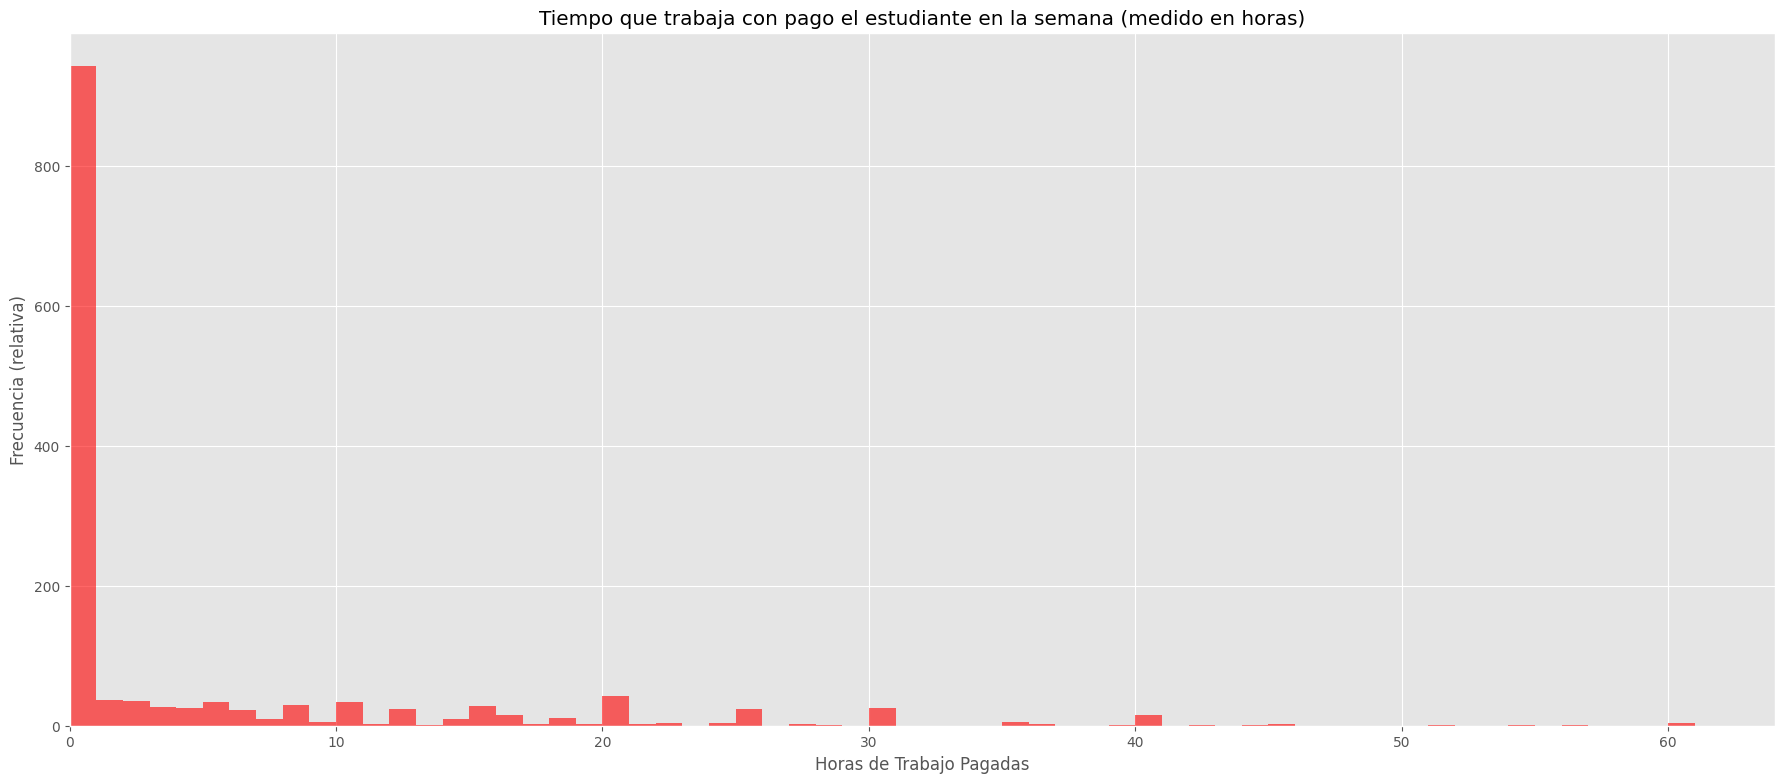

In [92]:
plt.figure(figsize=(22, 9))

# Crear el histograma con densidad y límites en el eje x
ax = df['Paid_Work_Hours'].plot.hist(bins=range(0, 64), xlim=(min_paid, max_paid), color='red')

# Superponer la curva de densidad
#df['Paid_Work_Hours'].plot.density(ax=ax, color='blue')

# Títulos y etiquetas
plt.title('Tiempo que trabaja con pago el estudiante en la semana (medido en horas)')
plt.xlabel('Horas de Trabajo Pagadas')
plt.ylabel('Frecuencia (relativa)')

plt.show()

Vemos que los valores apróximados de cada intervalo son:

(0, 1]	950	

(1, 2]	36	

(2, 3]	35	

(3, 4]	26	

(4, 5]	25

(5, 6]	30

(6, 7]	22

(7, 8]	10

(8, 9]	29

(9, 10]	5

(10, 11]	30

(11, 12]	5

(12, 13]	18

Teniendo en cuenta estos valores realizamos la suma de las anteriores frecuencias absolutas / suma total de las frecuencias absolutas:
(1215/1443)*100=84.20